## Practical Work 1

For this practical work, the trainees will develop a Python program that is able to implement the gradient descent in order to achieve the linear regression (Single and Multivariables) of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read RegData csv file into numpy array

In [37]:
data = np.genfromtxt('/content/sample_data/RegData.csv',delimiter=',')

In [38]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y.
#### Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [39]:
#data.insert(0,'ones',1)


In [40]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

In [41]:

X = data[:,0]
y = data[:,1]

#### Explore your data

In [42]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [43]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

Text(0, 0.5, 'y')

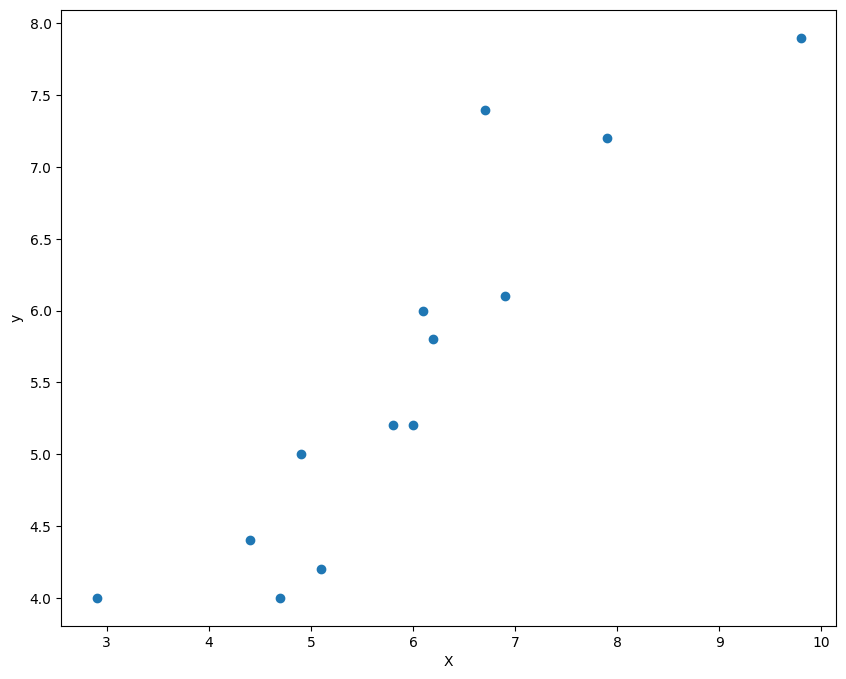

In [44]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")


## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.

In [45]:
theta0 = 0
theta1 = 0
alpha = 0.0001

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
#### Note: you will need to iterate through all data points

In [46]:
def y_predict(theta0,theta1):
    y_predict=theta0 + theta1*X
    return y_predict
y_pred=y_predict(0,0)
print("h(X)=",y_pred)

h(X)= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Step3: Calculate the MSE Cost function 𝑱(theta_0,theta_1 ).
<b>Note:</b> You better use either dot product or norm square of the error vector.

In [47]:
#J =(1/2*len(y_Predict))*sum(((y_Predict - y)**2))
m = len(X)
Error_Vector = (y_pred - y)
j =  ( Error_Vector.dot(Error_Vector)) /2/m
print("Error_Vector:",Error_Vector)
print("j=",j)


Error_Vector: [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]
j= 16.305384479692318


### Step4: Calculate the gradient components for theta_0 and theta_1.
<b>Note:</b> You can use the error vector calculated in the previous step.

In [48]:
d_theta_0 = (1/m) * sum(Error_Vector)
d_theta_1 = (1/m) * np.dot(Error_Vector , X)
print("d_theta_0 :",d_theta_0)
print("d_theta_1 :",d_theta_1)

d_theta_0 : -5.569230739769232
d_theta_1 : -35.04384604321539


### Step5: Update the parameters (simultaneously).

In [49]:
theta_0_new = theta0 - alpha*d_theta_0
theta_1_new = theta1 - alpha*d_theta_1
print("theta_0_new :",theta_0_new)
print("theta_1_new :",theta_1_new)

theta_0_new : 0.0005569230739769232
theta_1_new : 0.003504384604321539


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
#### The objective from this step is to combine all the previous steps and iterate untill you either achieve the maximum number of iterations or reach the minimum.

In [50]:
def GD(X,y):
   max_itreration=1000
   alpha=0.001
   count = 0
   theta0 = 0
   theta1 = 0
   m = len(X)
   eps=1e-6


   while(count<max_itreration  ):
        print(f' ****************** Iteration {count} ********************')

        h = y_predict(theta0,theta1)
        print("h(x) :  ",h)

        Error_Vector = (h - y)
        print("Error_Vector :   ",Error_Vector)

        j =  ( Error_Vector.dot(Error_Vector)) /2*m
        print("j =",j)

        d_theta_0 = (1/m) * sum(Error_Vector)
        d_theta_1 = (1/m) * np.dot(Error_Vector , X)
        Gradient_Vector = np.array([d_theta_0,d_theta_1]).reshape(-1, 1)
        print("Gradient Vector:"  ,  Gradient_Vector)

        norm = np.linalg.norm([d_theta_0,d_theta_1])
        print("Gradient Vector Norm:   ",norm)

        theta_0_new = theta0 - alpha*d_theta_0
        theta_1_new = theta1 - alpha*d_theta_1
        theta0= theta_0_new
        theta1= theta_1_new
        print("theta_0_new :     ",theta0)

        print("theta_1_new :     ",theta1)

        count += 1
        if norm <= eps:
                break

GD(X,y)



Streaming output truncated to the last 5000 lines.
 -0.38703856 -0.09820766  0.32413055  0.52464996  0.36932501 -0.29716834
  0.14646839]
j = 33.314895838591994
Gradient Vector: [[-0.08609937]
 [ 0.0134569 ]]
Gradient Vector Norm:    0.08714465246862667
theta_0_new :      0.19434638780189464
theta_1_new :      0.8882982217037186
 ****************** Iteration 616 ********************
h(x) :   [2.77041132 6.1459443  4.54700776 7.21190242 8.89966913 6.3236042
 5.61296546 5.70179519 5.52413572 4.72466723 4.36934786 4.10285865
 5.34647624]
Error_Vector :    [-1.22958868 -1.25405579 -0.45299224  0.01190261  0.99966904  0.2236043
 -0.38703454 -0.098205    0.32413591  0.52466743  0.36934786 -0.29714145
  0.14647643]
j = 33.31361246496771
Gradient Vector: [[-0.08609339]
 [ 0.01345597]]
Gradient Vector Norm:    0.08713860085181357
theta_0_new :      0.19443248119667983
theta_1_new :      0.8882847657335651
 ****************** Iteration 617 ********************
h(x) :   [2.77045839 6.14594024 4.5

In [51]:
def GDB(X,y,alpha,max_iteration):

    count = 0
    theta_0 = 0
    theta_1 = 0
    m = len(X)
    loss = []
    All_Theta_0 = []
    All_Theta_1 = []

    while count < max_iteration:




        print(f' ****************** Iteration {count} ********************')
        y_pred = theta_0 + theta_1 *  X
        print("h(x) :  ",y_pred)

        Error_Vector = (y_pred - y)
        print("Error_Vector :   ",Error_Vector)

        cost =  ( Error_Vector.dot(Error_Vector)) /2*m
        print("j =",cost)

        loss.append(cost)
        d_theta_0 = (1/m) * sum((y_pred - y))
        d_theta_1 = (1/m) * np.dot(y_pred - y , X)
        Gradient_Vector = np.array([d_theta_0,d_theta_1]).reshape(-1, 1)
        print("Gradient Vector:"  ,  Gradient_Vector)

        norm = np.linalg.norm([d_theta_0,d_theta_1])
        print("Gradient Vector Norm:   ",norm)


        theta_0_new = theta_0 - alpha * d_theta_0
        theta_1_new = theta_1 - alpha * d_theta_1
        theta_0 = theta_0_new
        print("theta_0_new :     ",theta_0)
        theta_1 = theta_1_new
        print("theta_0_new :     ",theta_1)
        All_Theta_0.append(theta_0)
        All_Theta_1.append(theta_1)
        count += 1
        if norm < 0.1:
                break




    return theta_0 , theta_1 ,loss , count , All_Theta_0,All_Theta_1,Error_Vector,y_pred,cost




theta_0 , theta_1 ,loss , count , All_Theta_0,All_Theta_1,Error_Vector,y_pred,cost= GDB(X,y,0.01,30000)
print("****************** Training Report ********************")

print(f'Gradient Descent converged after {count} epochs')
print("theta_0_Opt",theta_0)
print("theta_1_Opt",theta_1)

print("Error Vector:",Error_Vector)
print("cost",cost)
print("h(x) = y_predict:",y_pred)
print("y_actual:",y)


 ****************** Iteration 0 ********************
h(x) :   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Error_Vector :    [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]
j = 2755.6099770680016
Gradient Vector: [[ -5.56923074]
 [-35.04384604]]
Gradient Vector Norm:    35.48362265233601
theta_0_new :      0.05569230739769232
theta_0_new :      0.3504384604321539
 ****************** Iteration 1 ********************
h(x) :   [1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]
Error_Vector :    [-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]
j = 1043.6778885593178
Gradient Vector: [[ -3.42708175]
 [-21.33845263]]
Gradient Vector Norm:    21.611905283072655
theta_0_new :      0.089

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [52]:
print("h(x) = y_predict:")
print(y_pred)
print("y_actual:")
print(y)

h(x) = y_predict:
[2.74498295 6.14196626 4.53286904 7.21469817 8.91319004 6.32075512
 5.60560052 5.69499474 5.5162063  4.71165748 4.35408017 4.08589751
 5.33741786]
y_actual:
[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

Text(0, 0.5, 'y')

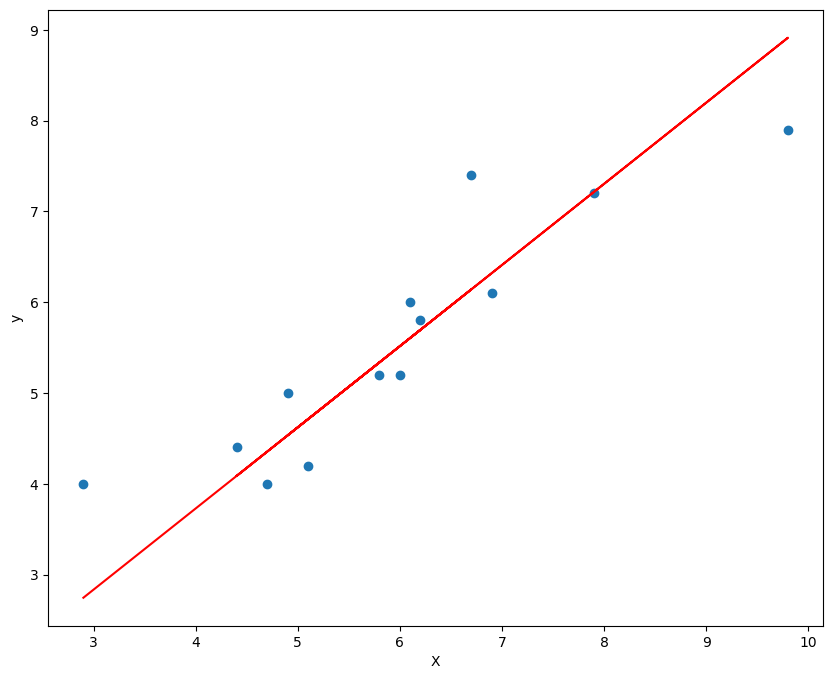

In [53]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X,y_pred,color="red")
plt.xlabel("X")
plt.ylabel("y")


#### Use R2 score to evaluate LR equation output
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [54]:
from sklearn.metrics import r2_score
print(r2_score(y,y_pred))

0.7480324921408193


## Plot loss function
### Repeat your implementaion version and save loss for each iteration (epoch)

In [55]:

theta_0 , theta_1 ,loss , count , All_Theta_0,All_Theta_1,Error_Vector,y_pred,cost= GDB(X,y,0.01,30000)



 ****************** Iteration 0 ********************
h(x) :   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Error_Vector :    [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]
j = 2755.6099770680016
Gradient Vector: [[ -5.56923074]
 [-35.04384604]]
Gradient Vector Norm:    35.48362265233601
theta_0_new :      0.05569230739769232
theta_0_new :      0.3504384604321539
 ****************** Iteration 1 ********************
h(x) :   [1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]
Error_Vector :    [-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]
j = 1043.6778885593178
Gradient Vector: [[ -3.42708175]
 [-21.33845263]]
Gradient Vector Norm:    21.611905283072655
theta_0_new :      0.089

### Plot loss vs. iterations

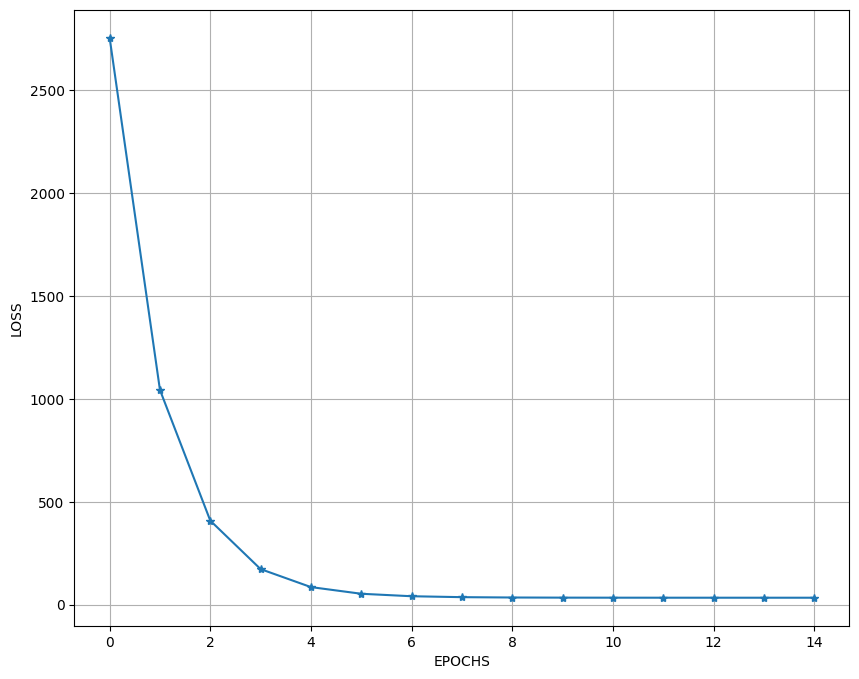

In [56]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(count),loss,'*-')
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.grid()

## Multivariate LR

#### Read MultiVarLR csv file into numpy array.
#### The first three columns are x1,x2, and x3.
#### The last column is the target label y.

In [57]:
data2 = np.genfromtxt('/content/sample_data/MultiVarLR.csv',delimiter=',')

In [58]:
data2

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [59]:
x0 = np.ones((len(data2),1))
X2 = np.append(x0,data2[:,0:3],axis=1)
print(X2)


[[  1.  73.  80.  75.]
 [  1.  93.  88.  93.]
 [  1.  89.  91.  90.]
 [  1.  96.  98. 100.]
 [  1.  73.  66.  70.]
 [  1.  53.  46.  55.]
 [  1.  69.  74.  77.]
 [  1.  47.  56.  60.]
 [  1.  87.  79.  90.]
 [  1.  79.  70.  88.]
 [  1.  69.  70.  73.]
 [  1.  70.  65.  74.]
 [  1.  93.  95.  91.]
 [  1.  79.  80.  73.]
 [  1.  70.  73.  78.]
 [  1.  93.  89.  96.]
 [  1.  78.  75.  68.]
 [  1.  81.  90.  93.]
 [  1.  88.  92.  86.]
 [  1.  78.  83.  77.]
 [  1.  82.  86.  90.]
 [  1.  86.  82.  89.]
 [  1.  78.  83.  85.]
 [  1.  76.  83.  71.]
 [  1.  96.  93.  95.]]


In [60]:

y2 = data2[:,-1].reshape(-1,1)
print(y2)


[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


### Generalize your implementation to work for MultiVariables
#### Vectorize your implementation.
<b>Notes:</b>
- You need to add column that contains ones to the data. This column represent x feature for theta_0.
- Use learninig rate = 0.0001.

In [61]:
def GD2(X,y):
   max_itreration=1000
   alpha=0.0001
   count = 0
   m = len(X)
   loss=[]
   theta = np.zeros(4).reshape(4,1)
   while(count<max_itreration ):


        print(f' ****************** Iteration {count} ********************')



        h = X2 @ theta
        print("h(x) :  ",h)

        Error_Vector = (h - y)
        print("Error_Vector :   ",Error_Vector)

        j = (1/(2*m))*sum(((h - y)**2))
        print("j =",j)
        loss.append(j)

        grad = ((1/m) * np.dot((h - y2).T ,X2)).T
        print("Gradient Vector :",grad)
        norm = np.linalg.norm(grad)
        print("Gradient Vector Norm:",norm)
        if(norm <= 0.001)  :
          break

        thetaa = theta - alpha * grad
        theta = thetaa
        t0 = theta[0]
        t1 = theta[1]
        t2 = theta[2]
        t3 = theta[3]
        thetas_new  = np.array([t0,t1,t2,t3]).reshape(-1, 1)
        print("thetas_new :",thetas_new)
        count += 1
   return thetas_new,count,loss,h



thetas_new,count,loss,h=GD2(X2,y2)




Streaming output truncated to the last 5000 lines.
 [184.87684697]
 [181.49416583]
 [198.73962275]
 [140.38712446]
 [105.29560313]
 [150.05063163]
 [113.00499137]
 [174.35866357]
 [163.98240616]
 [143.79340684]
 [142.69296738]
 [186.42260717]
 [153.50218152]
 [151.0276911 ]
 [188.53101609]
 [145.2291478 ]
 [180.49756361]
 [177.38231197]
 [158.78852884]
 [175.73677302]
 [174.42035356]
 [167.14798056]
 [151.61593459]
 [190.91809176]]
Error_Vector :    [[ 0.88302804]
 [-0.12315303]
 [ 1.49416583]
 [ 2.73962275]
 [-1.61287554]
 [ 4.29560313]
 [ 1.05063163]
 [-1.99500863]
 [-0.64133643]
 [-0.01759384]
 [ 2.79340684]
 [ 1.69296738]
 [ 2.42260717]
 [ 1.50218152]
 [ 3.0276911 ]
 [-3.46898391]
 [-1.7708522 ]
 [-2.50243639]
 [ 0.38231197]
 [-0.21147116]
 [-1.26322698]
 [-0.57964644]
 [-7.85201944]
 [ 2.61593459]
 [-1.08190824]]
j = [3.16532436]
Gradient Vector : [[ 0.07118559]
 [ 1.21571479]
 [ 0.237031  ]
 [-1.41399002]]
Gradient Vector Norm: 1.881111722906859
thetas_new : [[0.0034828 ]
 [0.451

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [62]:
h = X2 @ thetas_new
print("h(x) = y_predict:",h)
print("y",y2)

h(x) = y_predict: [[152.87121322]
 [184.85674383]
 [181.47483649]
 [198.75052368]
 [140.34382743]
 [105.31205204]
 [150.10779197]
 [113.11610301]
 [174.37742357]
 [164.06972743]
 [143.81388672]
 [142.72273052]
 [186.36979543]
 [153.41203893]
 [151.08774876]
 [188.54161627]
 [145.10262039]
 [180.58785665]
 [177.3277855 ]
 [158.74612896]
 [175.79168644]
 [174.43302327]
 [167.19171348]
 [151.52786662]
 [190.88314212]]
y [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


### Plot loss vs. iterations

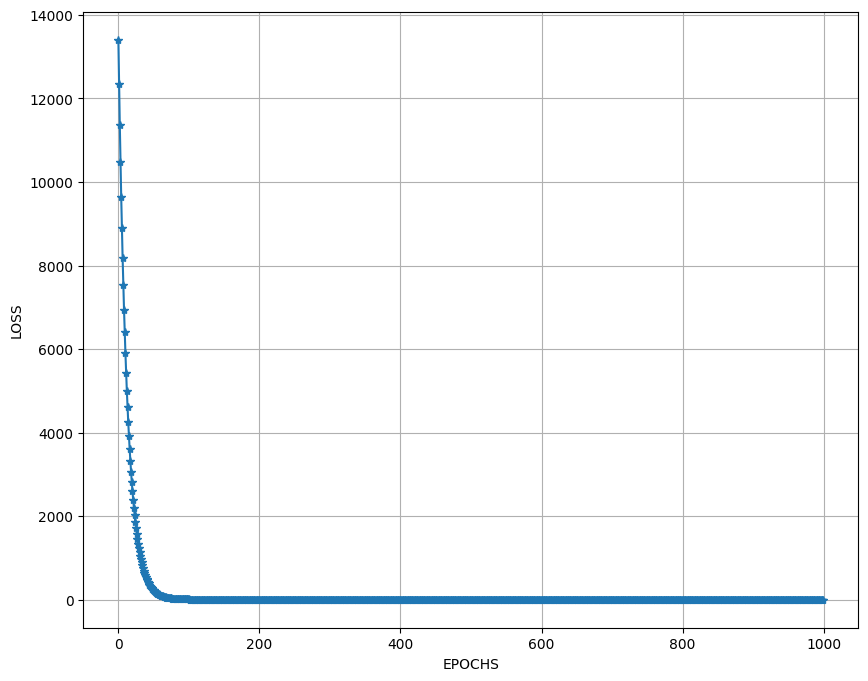

In [63]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(count),loss,'*-')
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.grid()

#### Use R2 score to evaluate LR equation output

In [64]:
from sklearn.metrics import r2_score
print(r2_score(y2,h))

0.9886850607889688
